<a href="https://colab.research.google.com/github/derek-shing/DS-Sprint-01-Dealing-With-Data/blob/master/Copy_of_LS_DS_222_Choose_appropriate_visualizations_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Financial Times Visual Vocabulary poster](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-01-22 17:33:48--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-01-22 17:33:48 (187 MB/s) - ‘misleading.py.1’ saved [1258/1258]



### Fix misleading plot #1

In [0]:
misleading.plot1();

In [0]:
misleading??


In [0]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})


def plot1():
    return insurance.plot.bar()
  


### Fix misleading plot #2

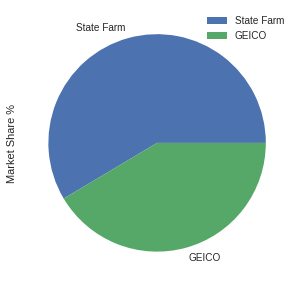

In [15]:
misleading.plot2();

In [0]:
def plot2():
    return insurance.plot.pie('Market Share %', figsize=(5, 5))

In [24]:
insurance.append(['Other', 100 - insurance.sum()])

,Market Share %,0
State Farm,18.07,NaN
GEICO,12.79,NaN
0,NaN,Other
1,NaN,Market Share % 69.14 dtype: float64


In [25]:
insurance


,Market Share %
State Farm,18.07
GEICO,12.79


## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [26]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
misleading??


In [0]:
def plot3():
    # Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
    import altair as alt
    from vega_datasets import data

    url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
    df = pd.read_csv(url)
    df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
    var iable = 'State Farm policy premiums'

    states = alt.topo_feature(data.us_10m.url, 'states')

    return alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(df, 'id', [variable])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    )

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
variable = 'State Farm policy premiums'


In [0]:
df

In [0]:
df['State Farm market share %']=(df['State Farm policy premiums']/df['STATE TOTAL'])

In [38]:
    import altair as alt
    variable = 'State Farm market share %'

    states = alt.topo_feature(data.us_10m.url, 'states')

    alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(df, 'id', [variable])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    )

NameError: ignored

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [3]:
df.shape

(44, 3)

### See the data

In [0]:
df

### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [7]:
group = df.groupby('dataset')

NameError: ignored

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [5]:
group.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [6]:
group.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [46]:
group.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [47]:
group.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [48]:
group.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

In [0]:
group.plot('x','y', kind='scatter')

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

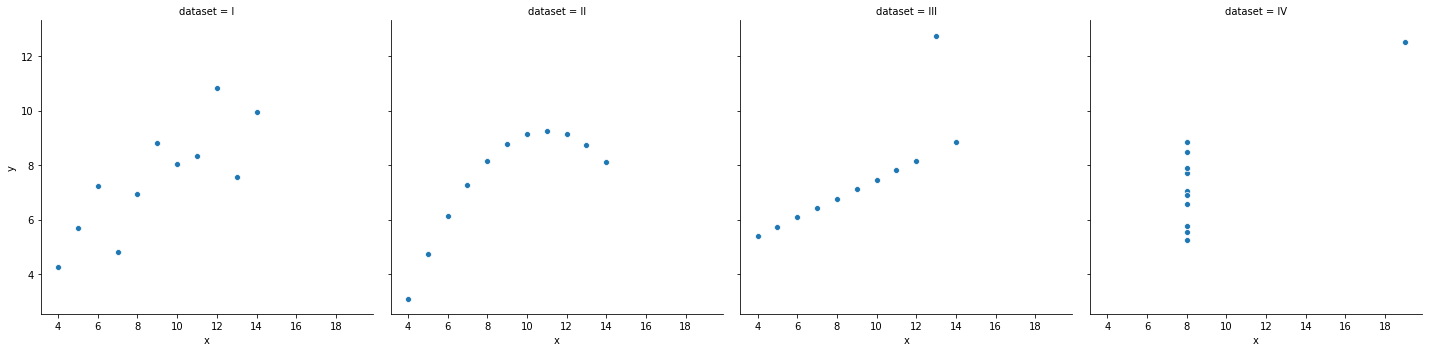

In [8]:
sns.relplot('x','y',col='dataset', data=df)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

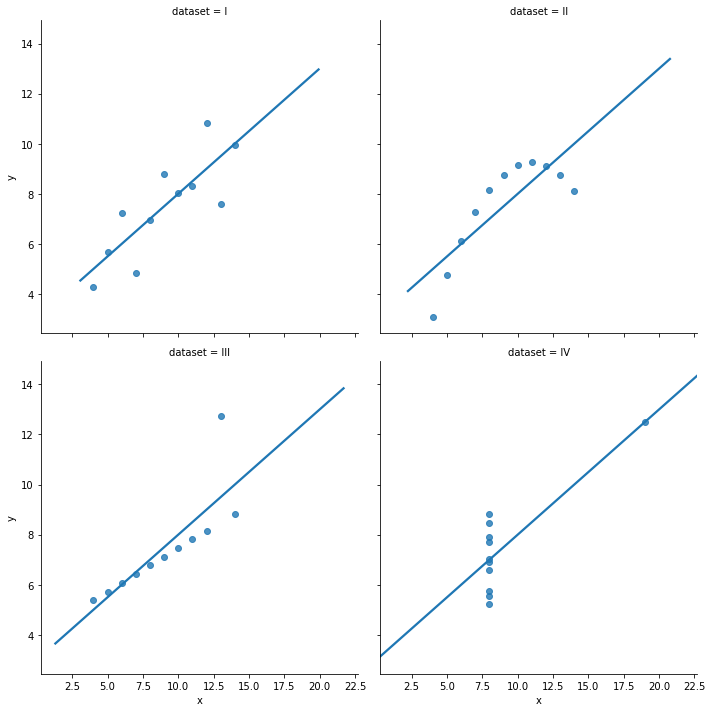

In [10]:
sns.lmplot('x','y',col='dataset',col_wrap=2,ci=None,data=df)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [12]:
tips.shape

(244, 7)

### See the first 5 rows

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [14]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

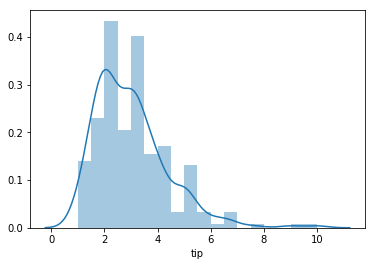

In [16]:
sns.distplot(tips.tip)

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [0]:
tips['percent']= tips.tip/tips.total_bill

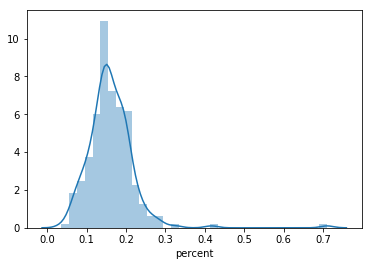

In [18]:
sns.distplot(tips.percent)

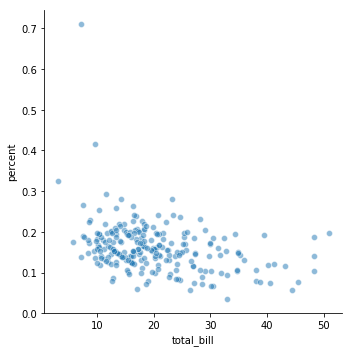

In [20]:
sns.relplot(x='total_bill',y='percent',data=tips,alpha=0.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

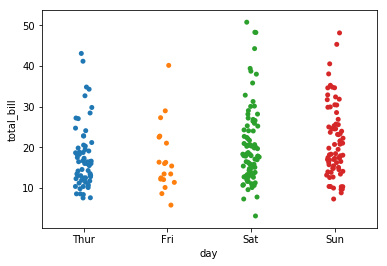

In [21]:
sns.stripplot(x='day',y='total_bill',data=tips)

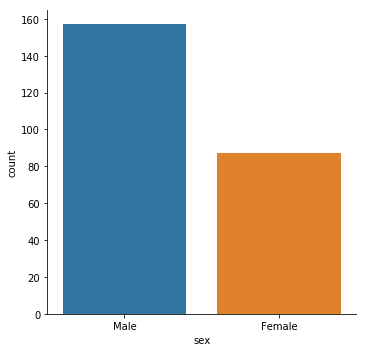

In [23]:
sns.catplot('sex',data=tips,kind='count')

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

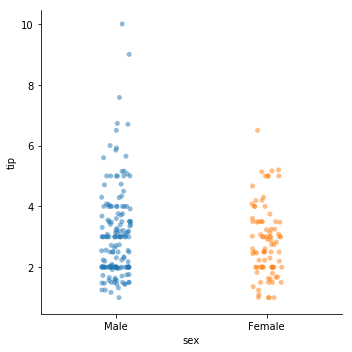

In [24]:
sns.catplot(x='sex',y='tip',data=tips, kind='strip',alpha=0.5)

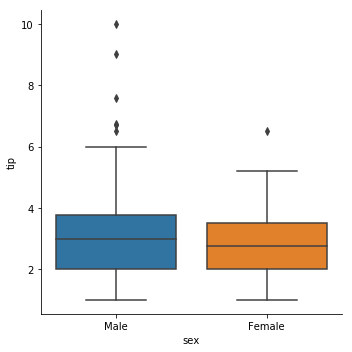

In [26]:
sns.catplot(x='sex',y='tip',data=tips, kind='box')

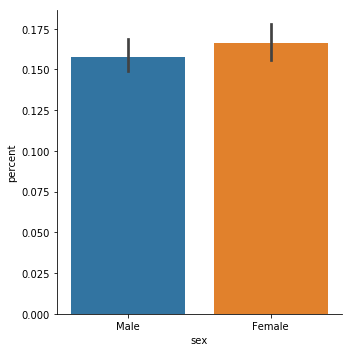

In [30]:
sns.catplot(x='sex',y='percent',kind='bar',data=tips)

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [32]:
flights.shape

(144, 3)

### See the first 5 rows

In [33]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [34]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

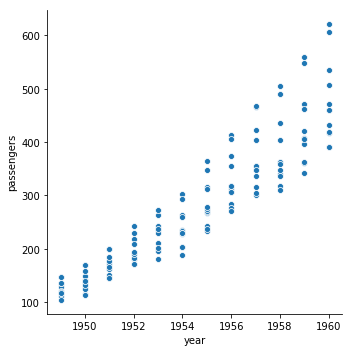

In [35]:
sns.relplot(x='year',y='passengers',data=flights)

### Plot month & passengers

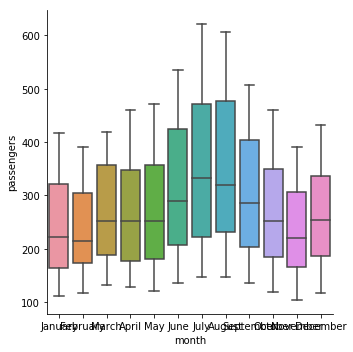

In [37]:
sns.catplot(x='month',y='passengers',data=flights, kind='box')

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) Experiment and make changes.

Take notes. Share your work with your cohort!


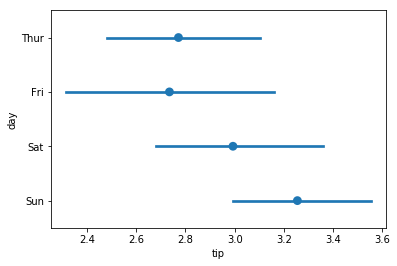

In [9]:
#Dotplot using seaborn

Dotsns.pointplot(x="tip", y="day", data=tips, join=False)

In [0]:
#Dotplot using Altair

import altair as alt

base = alt.Chart(tips)

In [0]:
points = base.mark_point(filled=True, size=50).encode(
    x=alt.X(
        "tip",
        scale=alt.Scale(domain=(0,10)),
        axis=alt.Axis(title='tip')
    ),
    y=alt.Y(
        'day',
        scale=alt.Scale(zero=False, domain=('Sat','Sun','Thur','Fri')),
        axis=alt.Axis(title="day")
    ),
    color=alt.value('black')
)

In [16]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [0]:
tips

In [26]:
points

Chart({
  data:      total_bill   tip     sex smoker   day    time  size
  0         16.99  1.01  Female     No   Sun  Dinner     2
  1         10.34  1.66    Male     No   Sun  Dinner     3
  2         21.01  3.50    Male     No   Sun  Dinner     3
  3         23.68  3.31    Male     No   Sun  Dinner     2
  4         24.59  3.61  Female     No   Sun  Dinner     4
  5         25.29  4.71    Male     No   Sun  Dinner     4
  6          8.77  2.00    Male     No   Sun  Dinner     2
  7         26.88  3.12    Male     No   Sun  Dinner     4
  8         15.04  1.96    Male     No   Sun  Dinner     2
  9         14.78  3.23    Male     No   Sun  Dinner     2
  10        10.27  1.71    Male     No   Sun  Dinner     2
  11        35.26  5.00  Female     No   Sun  Dinner     4
  12        15.42  1.57    Male     No   Sun  Dinner     2
  13        18.43  3.00    Male     No   Sun  Dinner     4
  14        14.83  3.02  Female     No   Sun  Dinner     2
  15        21.58  3.92    Male     No   Sun  Dinner     2
  16        10.33  1.67  Female     No   Sun  Dinner     3
  17        16.29  3.71    Male     No   Sun  Dinner     3
  18        16.97  3.50  Female     No   Sun  Dinner     3
  19        20.65  3.35    Male     No   Sat  Dinner     3
  20        17.92  4.08    Male     No   Sat  Dinner     2
  21        20.29  2.75  Female     No   Sat  Dinner     2
  22        15.77  2.23  Female     No   Sat  Dinner     2
  23        39.42  7.58    Male     No   Sat  Dinner     4
  24        19.82  3.18    Male     No   Sat  Dinner     2
  25        17.81  2.34    Male     No   Sat  Dinner     4
  26        13.37  2.00    Male     No   Sat  Dinner     2
  27        12.69  2.00    Male     No   Sat  Dinner     2
  28        21.70  4.30    Male     No   Sat  Dinner     2
  29        19.65  3.00  Female     No   Sat  Dinner     2
  ..          ...   ...     ...    ...   ...     ...   ...
  214       28.17  6.50  Female    Yes   Sat  Dinner     3
  215       12.90  1.10  Female    Yes   Sat  Dinner     2
  216       28.15  3.00    Male    Yes   Sat  Dinner     5
  217       11.59  1.50    Male    Yes   Sat  Dinner     2
  218        7.74  1.44    Male    Yes   Sat  Dinner     2
  219       30.14  3.09  Female    Yes   Sat  Dinner     4
  220       12.16  2.20    Male    Yes   Fri   Lunch     2
  221       13.42  3.48  Female    Yes   Fri   Lunch     2
  222        8.58  1.92    Male    Yes   Fri   Lunch     1
  223       15.98  3.00  Female     No   Fri   Lunch     3
  224       13.42  1.58    Male    Yes   Fri   Lunch     2
  225       16.27  2.50  Female    Yes   Fri   Lunch     2
  226       10.09  2.00  Female    Yes   Fri   Lunch     2
  227       20.45  3.00    Male     No   Sat  Dinner     4
  228       13.28  2.72    Male     No   Sat  Dinner     2
  229       22.12  2.88  Female    Yes   Sat  Dinner     2
  230       24.01  2.00    Male    Yes   Sat  Dinner     4
  231       15.69  3.00    Male    Yes   Sat  Dinner     3
  232       11.61  3.39    Male     No   Sat  Dinner     2
  233       10.77  1.47    Male     No   Sat  Dinner     2
  234       15.53  3.00    Male    Yes   Sat  Dinner     2
  235       10.07  1.25    Male     No   Sat  Dinner     2
  236       12.60  1.00    Male    Yes   Sat  Dinner     2
  237       32.83  1.17    Male    Yes   Sat  Dinner     2
  238       35.83  4.67  Female     No   Sat  Dinner     3
  239       29.03  5.92    Male     No   Sat  Dinner     3
  240       27.18  2.00  Female    Yes   Sat  Dinner     2
  241       22.67  2.00    Male    Yes   Sat  Dinner     2
  242       17.82  1.75    Male     No   Sat  Dinner     2
  243       18.78  3.00  Female     No  Thur  Dinner     2
  
  [244 rows x 7 columns],
  encoding: EncodingWithFacet({
    color: ColorValue({
      value: 'black'
    }),
    x: X({
      axis: Axis({
        title: 'tip'
      }),
      scale: Scale({
        domain: (0, 10)
      }),
      shorthand: 'tip'
    }),
    y: Y({
      axis: Axis({
        title: 'day'
      }),
      